In [3]:
import pandas as pd
import jax.numpy as jnp
import matplotlib.pyplot as plt
from math import isnan

In [4]:
data = pd.read_csv("pes_original_data.txt", sep='\s+')

In [5]:
Efinal = data["Efinal"].tolist()
Ahalf = data["A/2"].tolist()
Y3rd = data["Y3"].tolist()
Z3rd = data["Z3"].tolist()
print(len(Efinal), len(Ahalf), len(Y3rd), len(Z3rd))

9969 9969 9969 9969


In [6]:
clean_data = pd.DataFrame({"Ahalf": Ahalf, "Y": Y3rd, "Z": Z3rd, "E": Efinal})
clean_data.to_csv("pes_data.txt")

In [65]:
pes_data = pd.read_csv("pes_data.txt")
A = jnp.array(pes_data["Ahalf"].tolist()) * 2
Y = jnp.array(pes_data["Y"].tolist())
Z = jnp.array(pes_data["Z"].tolist())
B = jnp.sqrt(Y**2 + (Z - A/2)**2)
C = jnp.sqrt(Y**2 + (Z + A/2)**2)
E = jnp.array(pes_data["E"].tolist())
inputs = [[a.item(), b.item(), c.item()] for a, b, c in zip(A, B, C)]
bond_data = pd.DataFrame({"inputs": inputs, "energy": E})

In [64]:
bond_data.to_csv("pes_bond.txt")

In [66]:
morse_inputs = [[jnp.exp(-a).item(), jnp.exp(-b).item(), jnp.exp(-c).item()] for a, b, c in zip(A, B, C)]
morse_data = pd.DataFrame({"inputs": morse_inputs, "energy": E})
morse_data.to_csv("pes_morse.txt")

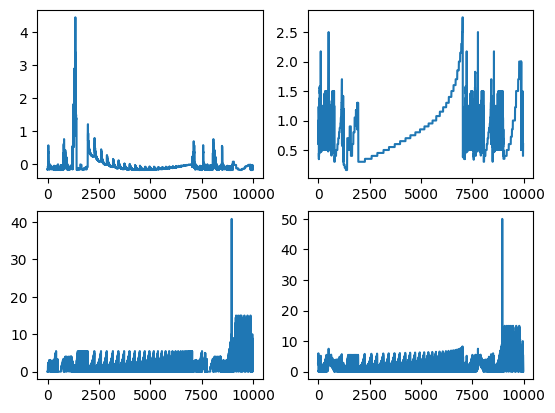

In [ ]:
pes_data = pd.read_csv("pes_data.txt")
fig, ax = plt.subplots(2, 2)
ax[0, 0].plot(range(len(pes_data["E"])), pes_data["E"])
ax[0, 1].plot(range(len(pes_data["Ahalf"])), pes_data["Ahalf"])
ax[1, 0].plot(range(len(pes_data["Y"])), pes_data["Y"])
ax[1, 1].plot(range(len(pes_data["Z"])), pes_data["Z"])
fig.show()

In [10]:
Y = jnp.array(pes_data["Y"].tolist())
Z = jnp.array(pes_data["Z"].tolist())
A = jnp.array(pes_data["Ahalf"].tolist()) * 2
B = jnp.sqrt(Y**2 + (Z + A/2)**2)
cos_alpha = (Z + A/2) / B
E = jnp.array(pes_data["E"].tolist())

/var/folders/hf/60jhbx_s40b92cvfxl5gbbb80000gn/T/ipykernel_1109/579335627.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_.show()


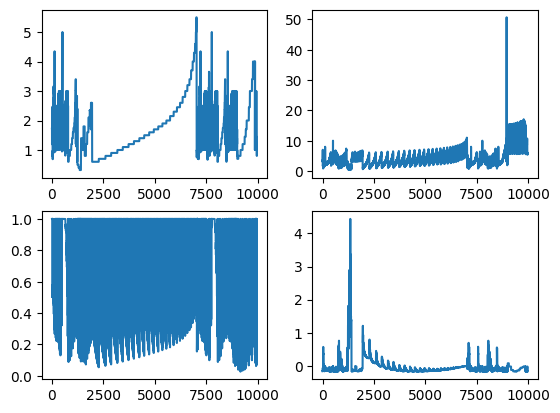

In [11]:
fig_, ax_ = plt.subplots(2, 2)
ax_[0, 0].plot(range(len(A)), A)
ax_[0, 1].plot(range(len(B)), B)
ax_[1, 0].plot(range(len(cos_alpha)), cos_alpha)
ax_[1, 1].plot(range(len(E)), E)
fig_.show()

In [15]:
print(min(A), max(A))

0.32 5.5


In [12]:
inputs = [[c.item(), jnp.exp(-a).item(), jnp.exp(-b).item()] for c, a, b in zip(cos_alpha, A, B)]
feature_data = pd.DataFrame({"inputs": inputs, "energy": E})

In [14]:
feature_data.to_csv("pes.txt")

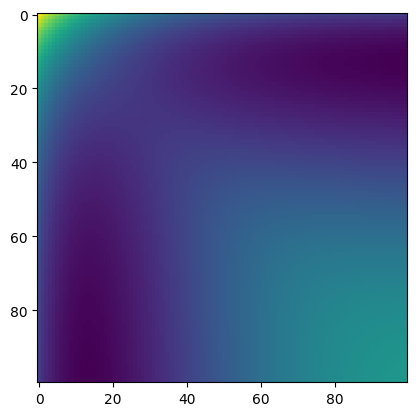

In [25]:
from bkmp2 import bkmp2
r = jnp.linspace(1, 4, 100)
bkmp2_inputs = jnp.array([[r1, r2, jnp.sqrt(r1**2 + r2**2)] for r1 in r for r2 in r])
bkmp2_energy = jnp.array([bkmp2(i, 0)[0] for i in bkmp2_inputs]).reshape(len(r), len(r))
plt.imshow(bkmp2_energy)

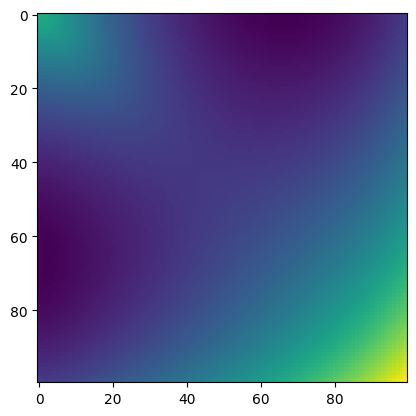

In [38]:
z = jnp.linspace(jnp.exp(-40), jnp.exp(-1), 100)
z_inputs = jnp.array([[-jnp.log(z1), -jnp.log(z2), jnp.sqrt(jnp.log(z1)**2 + jnp.log(z2)**2)] for z1 in z for z2 in z])
z_energy = jnp.array([bkmp2(i, 0)[0] for i in z_inputs]).reshape(len(z), len(z))
plt.imshow(z_energy)

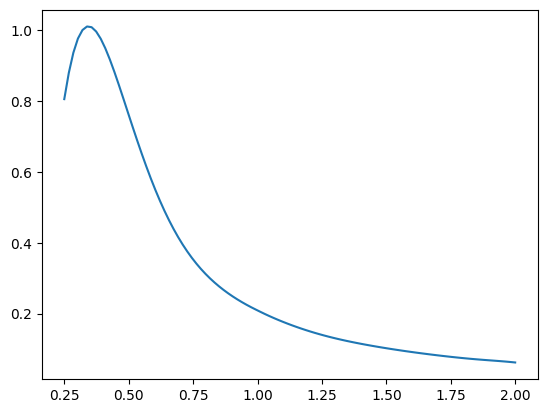

In [49]:
r_ = 1
r = jnp.linspace(0.25, 2*r_, 100)
t_inputs = jnp.array([[r_, r_, ri] for ri in r])
t_energy = jnp.array([bkmp2(inp, 0)[0] for inp in t_inputs])
plt.plot(r, t_energy)
plt.show()

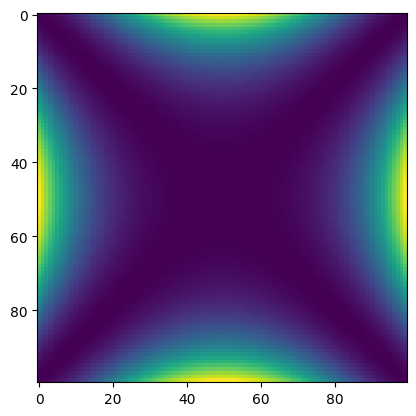

In [62]:
x = jnp.linspace(-2, 2, 100)
y = jnp.linspace(-2, 2, 100)
X, Y = jnp.meshgrid(x, y)
plt.imshow((X**2 - Y**2)**2)
